<a href="https://colab.research.google.com/github/yvrjsharma/MLApps_with_Gradio/blob/main/Use_Gradio_Demos_via_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using the Gradio Demos as an API endpoint.**

We will be using the OneFormer demo as an API endpoint.
To access the demo, you can goto Huggingface hosted Gradio demo for OneFormer model from SHI labs here - https://huggingface.co/spaces/shi-labs/OneFormer

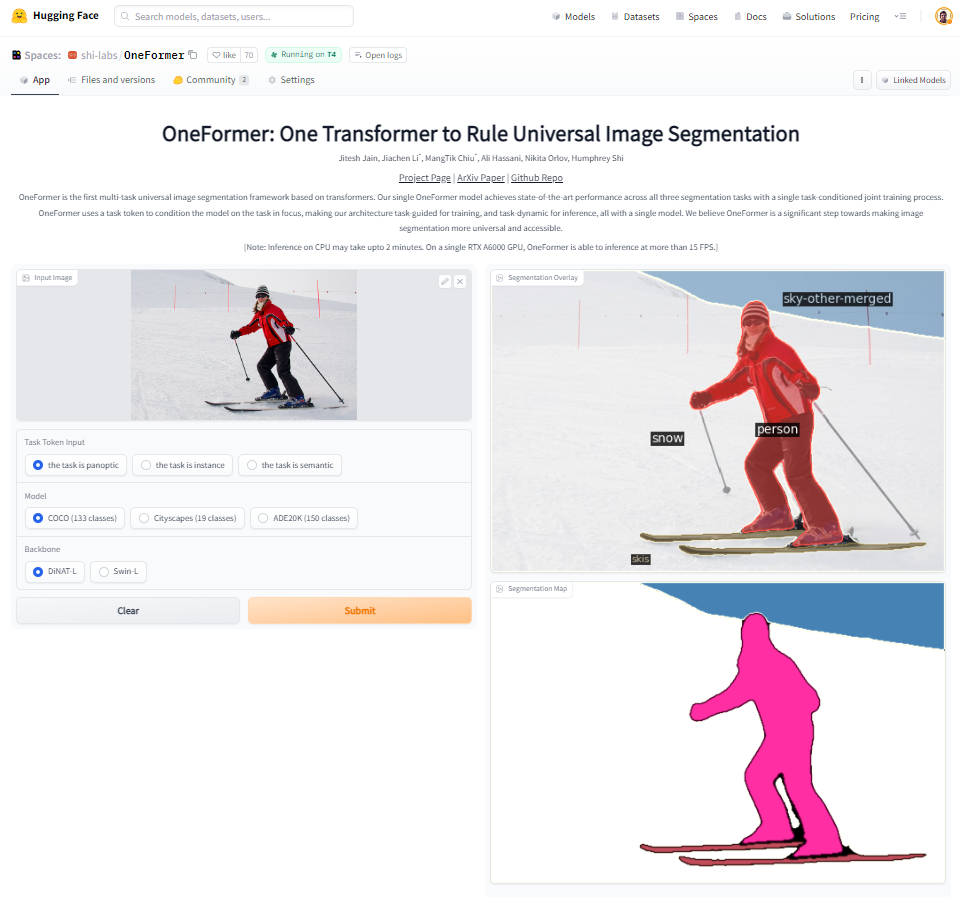

### You can then click the 'Use via API' given at the bottom of the webpage - 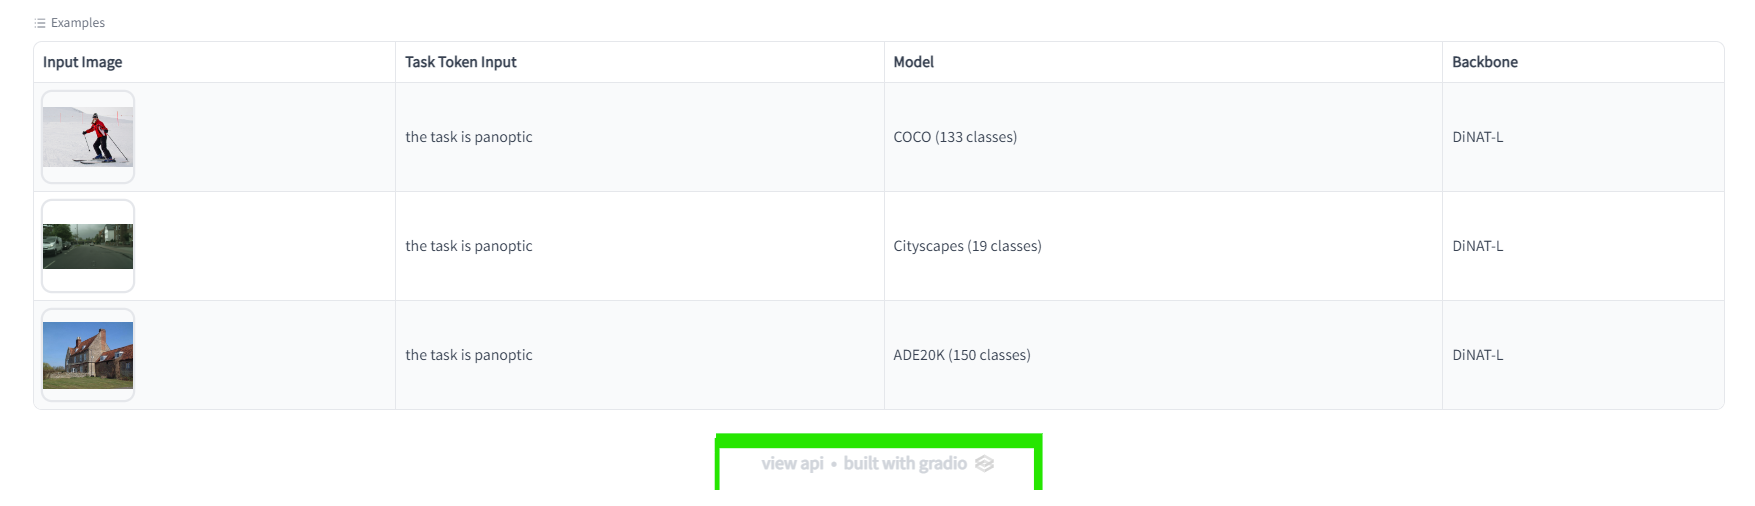

### This will take you to the API usage page which helps you with the information on **Input Payload** and the **Response JSON Object** ->

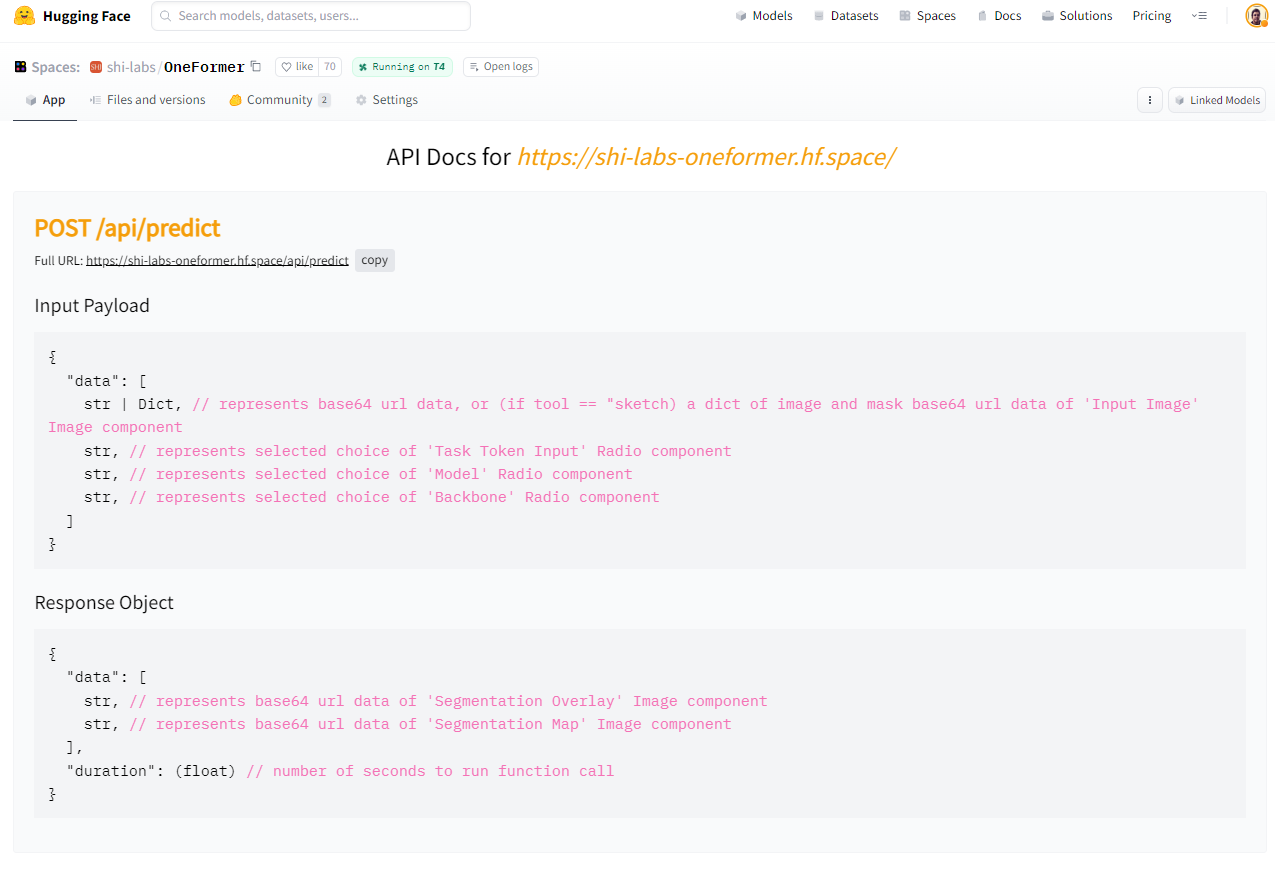

In [2]:
#Getting the API URL for the Gradio demo
API_URL = "https://shi-labs-oneformer.hf.space/api/predict"

In [1]:
#Install Gradio
!pip install gradio --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:
#Importing required libraries
import gradio as gr
import base64
import requests
from PIL import Image
from io import BytesIO

## Converting image into a base64 image string

In [4]:
def encode(img):
  with open(img, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

  return encoded_string

In [6]:
#Adding an image to the Colab Files as cat1.jpg
encode_image = encode('cat1.jpg')

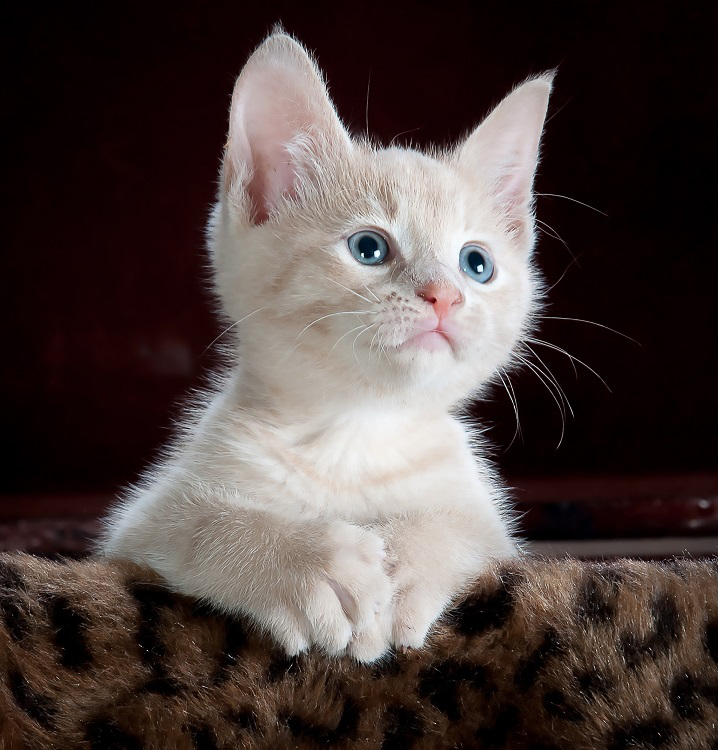

In [11]:
# Open the image
img = Image.open("cat1.jpg")

# Display the image
img

## Geting the segmentation mask using the API call to this hosted Oneformer Gradio demo  

The input payload from API information page of the OneFOrmer Space-
```
{
  "data": [
    str | Dict, // represents base64 url data, or (if tool == "sketch) a dict of image and mask base64 url data of 'Input Image' Image component
    str, // represents selected choice of 'Task Token Input' Radio component
    str, // represents selected choice of 'Model' Radio component
    str, // represents selected choice of 'Backbone' Radio component
  ]
}
```


In [14]:
#Making the API call with Image encoded as base64 input string 
def get_seg_mask(encode_image):
  response = requests.post(API_URL, json={"data": 
                                          ["data:image/jpg;base64," + encode_image,
                                           "the task is panoptic", "COCO (133 classes)", "DiNAT-L"]}).json()
  return response['data']

In [41]:
images = get_seg_mask(encode_image= encode_image)
#images


## Decoding base64 image outputs and saving the segmentation mask on the disk

In [17]:
def decode(imgs):
    # base64-encoded image data
    base64_data0 = imgs[0][22:] #images[0][22:] #get_seg_mask('cat11.jpg')[0]
    base64_data1 = imgs[1][22:] #images[1][22:] #get_seg_mask('cat11.jpg')[1]

    # Decode the base64 data
    image_data0 = base64.b64decode(base64_data0)
    image_data1 = base64.b64decode(base64_data1)

    # Load the image data into PIL Image object
    image0 = Image.open(BytesIO(image_data0))
    image1 = Image.open(BytesIO(image_data1))

    # return the image
    return image0, image1

In [18]:
image0, image1 = decode(images)

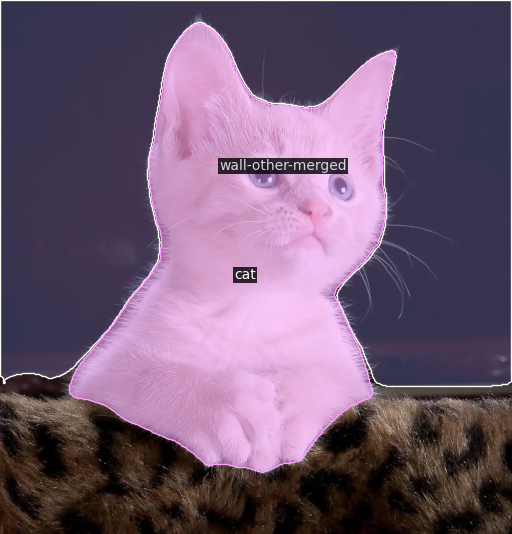

In [19]:
image0

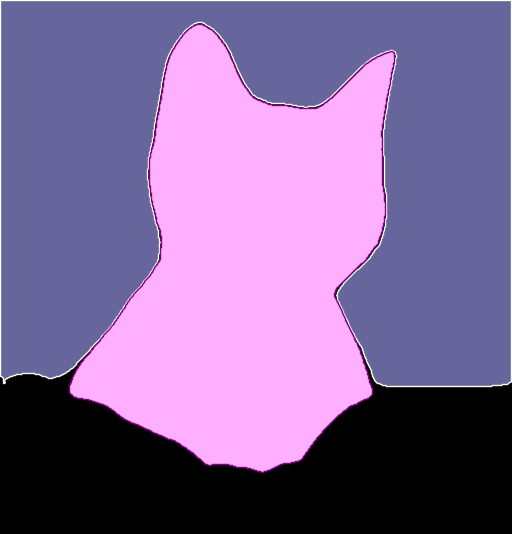

In [20]:
#The segmentation mask - required for ControlNet call 
image1

In [21]:
#Saving the mak to the disk
image1.save('temp1.jpg')

## Next using the gr.Blocks.load() method to load the Control Net space from HuggingFace repo. This method loads both input and output components automatically from the repo.

Note: You can load any Gradio Space like this. Please keep in mind by the tie you run this Colab, I might have decommisioned the `"ysharma/ControlNetSegmentation"` Space as it is consuming costly GPUs. 

In [24]:
#Copying the Space unique identifier 
space = "ysharma/ControlNetSegmentation"

In [33]:
#Loading the ControlNet Space locally
fun = gr.Blocks.load(name = "spaces/ysharma/ControlNetSegmentation")

Fetching Space from: https://huggingface.co/spaces/ysharma/ControlNetSegmentation


In [34]:
#Displaying fun to understand the arguments we need to pass to the demo
fun

Gradio Blocks instance: 1 backend functions
-------------------------------------------
fn_index=0
 inputs:
 |-image
 |-textbox
 |-textbox
 |-textbox
 |-slider
 |-slider
 |-slider
 |-slider
 |-slider
 |-slider
 |-number
 outputs:
 |-gallery

In [35]:
#making the function call, with the segmentation mask we have just saved to the disk, and the prompt of ControlNet Space and rest of the configuration parameters 
controlnet_output = fun('temp1.jpg', "batman","","", 1, 512, 512, 20, 9, 1234, 0, fn_index=0)

In [36]:
#A temporary folder will be created in your Colab Files.
controlnet_output

'/content/b73841c7-860f-47d4-a3a4-500d40a2963c'

In [37]:
import os
os.listdir("/content")

['.config',
 'b73841c7-860f-47d4-a3a4-500d40a2963c',
 'temp1.jpg',
 'cat1.jpg',
 'sample_data']

In [38]:
os.listdir("/content/b73841c7-860f-47d4-a3a4-500d40a2963c")

['captions.json', 'tmp5sqdypcv3amkmvln.png', 'tmpnxzc0uf71w_jdoum.png']

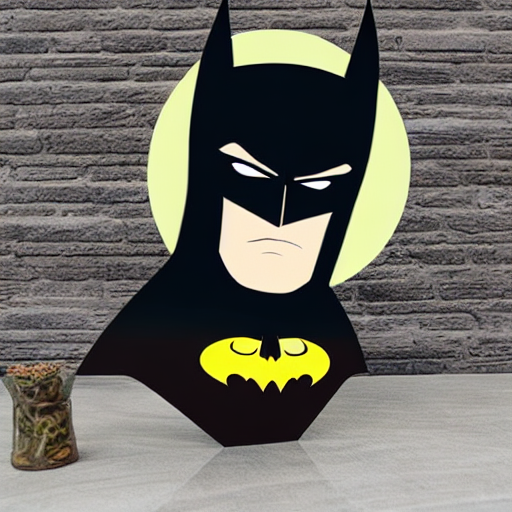

In [40]:
# To access the image generated image from ControlNet -
# Open the image
img = Image.open("/content/b73841c7-860f-47d4-a3a4-500d40a2963c/tmp5sqdypcv3amkmvln.png")

# Display the image
img